In [4]:
#pip install open3d

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
#pip install --upgrade setuptools

  Attempting uninstall: setuptools
    Found existing installation: setuptools 66.0.0
    Uninstalling setuptools-66.0.0:
      Successfully uninstalled setuptools-66.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.5.0 requires google-auth<2,>=1.6.3, but you have google-auth 2.11.0 which is incompatible.


In [7]:
#pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [11]:
#pip install  pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
import imageio as iio
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt


In [14]:
with open('test.npy', 'rb') as f:
    pcd = np.load(f)
print(pcd)

[[ -2.14920429  -1.63684617   4.        ]
 [ -1.6067541   -1.22763463   3.        ]
 [ -1.06773666  -0.81842308   2.        ]
 ...
 [260.64242809  38.15263967 164.        ]
 [260.92391301  38.15263967 164.        ]
 [261.20539792  38.15263967 164.        ]]


In [15]:
# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

In [6]:
def compute_pcd_vectorization(depth_im):
    """
    This function use victorization operations to optimize time.
    We can do better by computing constants first.
    Please see the main function.
    :param depth_im: a depth image
    :return: the computed point cloud
    """
    # get depth resolution:
    height, width = depth_im.shape
    # compute indices:
    jj = np.tile(range(width), height)
    ii = np.repeat(range(height), width)
    # rechape depth image
    z = depth_im.reshape(height * width)
    # compute pcd:
    pcd = np.dstack([(ii - CX_DEPTH) * z / FX_DEPTH,
                    (jj - CY_DEPTH) * z / FY_DEPTH,
                    z]).reshape((length, 3))
    return pcd

In [16]:
if __name__ == '__main__':
    # Camera parameters:
    FX_DEPTH = 5.8262448167737955e+02
    FY_DEPTH = 5.8269103270988637e+02
    CX_DEPTH = 3.1304475870804731e+02
    CY_DEPTH = 2.3844389626620386e+02

    # Read depth image:
    # ../data/depth.png
    depth_image = iio.imread('../Project-demo/test_output.png')

    # print some properties:
    print(f"Image resolution: {depth_image.shape}")
    print(f"Data type: {depth_image.dtype}")
    print(f"Min value: {np.min(depth_image)}")
    print(f"Max value: {np.max(depth_image)}")

    # Compute depth grayscale:
    depth_grayscale = np.array(256 * depth_image / 0x0fff, dtype=np.uint8)
    iio.imwrite('../Project-demo/depth_grayscale.png', depth_grayscale)

    # Display depth and grayscale image:
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(depth_image, cmap="gray")
    axs[0].set_title('Depth image')
    axs[1].imshow(depth_grayscale, cmap="gray")
    axs[1].set_title('Depth grayscale image')
    plt.show()

    # get depth image resolution:
    height, width,depth = depth_image.shape
    
    # compute indices:
    jj = np.tile(range(width), height)
    ii = np.repeat(range(height), width)
    # Compute constants:
    xx = (jj - CX_DEPTH) / FX_DEPTH
    yy = (ii - CY_DEPTH) / FY_DEPTH
    # transform depth image to vector of z:
    length = height * width
    
    z = depth_image.reshape(length)
    
    # compute point cloud
    pcd = np.dstack((xx * z, yy * z, z)).reshape((length, 3))

    # Convert to Open3D.PointCLoud:
    pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
    pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
    # Visualize:
    o3d.visualization.draw_geometries([pcd_o3d])

<ipython-input-16-21e20cea6d74>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image = iio.imread('../Project-demo/test_output.png')


FileNotFoundError: No such file: 'D:\1111_NUS_Study_Life\2022_2023_Semester 2\ISM\Project-demo\test_output.png'

<ipython-input-17-69678ccdd161>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image = iio.imread('../Project-demo/pointcloudprocessing-main/data/depth.png')


Image resolution: (480, 640)
Data type: uint16
Min value: 0
Max value: 2980


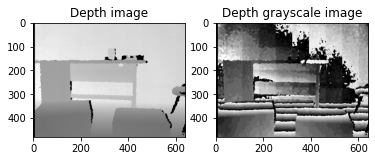

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 


In [17]:
if __name__ == '__main__':
    # Camera parameters:
    FX_DEPTH = 5.8262448167737955e+02
    FY_DEPTH = 5.8269103270988637e+02
    CX_DEPTH = 3.1304475870804731e+02
    CY_DEPTH = 2.3844389626620386e+02

    # Read depth image:
    # ../data/depth.png
    depth_image = iio.imread('../Project-demo/pointcloudprocessing-main/data/depth.png')

    # print some properties:
    print(f"Image resolution: {depth_image.shape}")
    print(f"Data type: {depth_image.dtype}")
    print(f"Min value: {np.min(depth_image)}")
    print(f"Max value: {np.max(depth_image)}")

    # Compute depth grayscale:
    depth_grayscale = np.array(256 * depth_image / 0x0fff, dtype=np.uint8)
    iio.imwrite('../Project-demo/new_gray.png', depth_grayscale)

    # Display depth and grayscale image:
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(depth_image, cmap="gray")
    axs[0].set_title('Depth image')
    axs[1].imshow(depth_grayscale, cmap="gray")
    axs[1].set_title('Depth grayscale image')
    plt.show()

    # get depth image resolution:
    height, width = depth_image.shape
    
    # compute indices:
    jj = np.tile(range(width), height)
    ii = np.repeat(range(height), width)
    # Compute constants:
    xx = (jj - CX_DEPTH) / FX_DEPTH
    yy = (ii - CY_DEPTH) / FY_DEPTH
    # transform depth image to vector of z:
    length = height * width
    
    z = depth_image.reshape(length)
    
    # compute point cloud
    pcd = np.dstack((xx * z, yy * z, z)).reshape((length, 3))

    # Convert to Open3D.PointCLoud:
    pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
    pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
    # Visualize:
    o3d.visualization.draw_geometries([pcd_o3d])

In [3]:
depth_image

NameError: name 'depth_image' is not defined

In [14]:
depth_image.shape

(480, 640)

In [11]:
depth_image_1 = iio.imread('../Project-demo/test_output.png')

<ipython-input-11-9d2dcd17b565>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image_1 = iio.imread('../Project-demo/test_output.png')


In [20]:
depth_image_2 = iio.imread('../Project-demo/test_img.png')

<ipython-input-20-1d2c0635936a>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  depth_image_2 = iio.imread('../Project-demo/test_img.png')


In [13]:
depth_image_1.shape

(375, 1242, 3)

In [22]:
depth_image_1

Array([[[  3,   3,  17],
        [  1,   1,  11],
        [  1,   0,   7],
        ...,
        [197,  60, 116],
        [198,  60, 115],
        [198,  60, 115]],

       [[  3,   3,  17],
        [  1,   1,  11],
        [  1,   0,   7],
        ...,
        [197,  60, 116],
        [197,  60, 116],
        [198,  60, 115]],

       [[  3,   3,  17],
        [  1,   1,  11],
        [  1,   0,   7],
        ...,
        [197,  60, 116],
        [197,  60, 116],
        [197,  60, 116]],

       ...,

       [[  4,   4,  21],
        [  2,   2,  15],
        [  1,   1,   9],
        ...,
        [251, 252, 191],
        [251, 252, 191],
        [251, 252, 191]],

       [[  4,   4,  21],
        [  2,   2,  15],
        [  1,   1,   9],
        ...,
        [251, 252, 191],
        [251, 252, 191],
        [251, 252, 191]],

       [[  4,   4,  21],
        [  2,   2,  15],
        [  1,   1,   9],
        ...,
        [251, 252, 191],
        [251, 252, 191],
        [251, 252, 191]]

In [18]:
depth_image_2.shape

(375, 1242, 3)

In [21]:
depth_image_2

Array([[[ 28,  28,  29],
        [ 27,  28,  29],
        [ 25,  28,  29],
        ...,
        [ 33,  42,  53],
        [ 34,  42,  54],
        [ 35,  42,  54]],

       [[ 29,  30,  33],
        [ 29,  30,  32],
        [ 26,  30,  32],
        ...,
        [ 36,  42,  53],
        [ 35,  44,  52],
        [ 34,  44,  52]],

       [[ 25,  29,  34],
        [ 25,  32,  33],
        [ 25,  33,  33],
        ...,
        [ 34,  41,  52],
        [ 34,  43,  50],
        [ 35,  44,  51]],

       ...,

       [[ 93,  99, 108],
        [ 93, 102,  96],
        [ 95,  98,  90],
        ...,
        [ 24,  34,  47],
        [ 24,  34,  47],
        [ 24,  34,  46]],

       [[ 94,  97,  95],
        [ 93, 100,  99],
        [ 95,  98, 102],
        ...,
        [ 24,  35,  53],
        [ 24,  34,  53],
        [ 25,  33,  51]],

       [[ 88,  99,  94],
        [ 87,  98, 101],
        [ 97,  94, 101],
        ...,
        [ 27,  41,  53],
        [ 28,  40,  51],
        [ 29,  38,  50]]

In [23]:
raw_image = iio.imread('../Project-demo/pointcloudprocessing-main/data/rgb.jpg')

<ipython-input-23-da2cb1bc5743>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  raw_image = iio.imread('../Project-demo/pointcloudprocessing-main/data/rgb.jpg')


In [24]:
raw_image

Array([[[166, 151, 184],
        [170, 154, 190],
        [172, 158, 194],
        ...,
        [198, 166, 207],
        [202, 166, 210],
        [199, 163, 209]],

       [[166, 150, 186],
        [169, 153, 190],
        [170, 155, 194],
        ...,
        [196, 164, 205],
        [200, 164, 208],
        [200, 164, 210]],

       [[170, 154, 193],
        [171, 155, 194],
        [172, 155, 197],
        ...,
        [194, 164, 202],
        [196, 163, 206],
        [198, 165, 210]],

       ...,

       [[112,  83,  85],
        [113,  84,  88],
        [113,  81,  94],
        ...,
        [ 95,  64,  80],
        [ 94,  61,  80],
        [ 93,  58,  80]],

       [[117,  85,  90],
        [116,  83,  90],
        [118,  82,  96],
        ...,
        [ 98,  67,  83],
        [ 96,  63,  82],
        [ 93,  60,  81]],

       [[118,  83,  89],
        [118,  83,  90],
        [121,  82, 100],
        ...,
        [ 98,  67,  83],
        [ 96,  63,  82],
        [ 93,  60,  81]]

In [26]:
depth_image

Array([[   0,    0,    0, ..., 2335, 2335, 2335],
       [   0,    0,    0, ..., 2351, 2335, 2335],
       [   0,    0,    0, ..., 2351, 2335, 2335],
       ...,
       [   0,    0,    0, ..., 1404, 1404, 1404],
       [   0,    0,    0, ..., 1399, 1399, 1399],
       [   0,    0,    0, ..., 1399, 1393, 1393]], dtype=uint16)

In [27]:
depth_grayscale

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 1, 1],
       [0, 0, 0, ..., 2, 1, 1],
       ...,
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7]], dtype=uint8)